### Time_Series_Feature_Engineering

Jay Urbain, PhD

Credits:  
- Introduction to Time Series Forecasting with Python, Jason Brownlee.  
- Python Data Science Handbook, Jake VanderPlas.  
- Chris Albion, https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/


In [94]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.0.0
numpy: 1.13.3
matplotlib: 3.0.0
pandas: 0.21.1
statsmodels: 0.9.0
sklearn: 0.19.1


Time Series data must be re-framed as a supervised learning dataset before we can start using machine learning algorithms. 

There is no concept of input and output features in time series. Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps. In this tutorial, you will discover how to perform feature engineering on time series data with Python to model your time series problem with machine learning algorithms.

Transform standard time series:  
time 1, value 1  
time 2, value 2  
time 3, value 3  

To the following for ML:  
input 1, output 1  
input 2, output 2  
input 3, output 3  


Classes of features that we can create from our time series dataset:
- Date Time Features: these are components of the time step itself for each observation.  
- Lag Features: these are values at prior time steps.  
- Window Features: these are a summary of values over a fixed window of prior time steps.  


#### Load Minimum Daily Temperatures Dataset

The Minimum Daily Temperatures dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. 

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html 

In [98]:
# create date time features of a dataset
from pandas import Series
from pandas import DataFrame
dataframe = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0]) 
dataframe.head() 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [114]:
df = dataframe.copy() 
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].iloc[0].month

1

If you want new columns showing year and month separately you can do this:

In [64]:
t = pandas.tslib.Timestamp.now()
print( type(t) )
t

<class 'pandas._libs.tslib.Timestamp'>


Timestamp('2018-10-31 10:41:27.086050')

In [62]:
t.month

10

In [54]:
df = dataframe.copy()
df['month'] = [df.index[i].month for i in range(len(series))] 
df['day'] = [df.index[i].day for i in range(len(series))] 
df['temperature'] = [df[i] for i in range(len(series))] 
df.head(5)

AttributeError: 'int' object has no attribute 'month'

Two features that we can start with are the integer month and day for each observation. We can imagine that supervised learning algorithms may be able to use these inputs to help tease out time-of-year or time-of-month type seasonality information. 

The supervised learning problem we are proposing is to predict the daily minimum temperature given the month and day, as follows:  
Month, Day, Temperature  
Month, Day, Temperature  
Month, Day, Temperature  

#### Exploring Time Series Data

In [11]:
# summarize first few lines of a file
series.head(10)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

In [12]:
print(series.tail(10))

Date
1959-12-22    39
1959-12-23    40
1959-12-24    38
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, dtype: int64


In [13]:
# summarize the dimensions of a time series
from pandas import Series
print(series.size)

365


#### Querying By Time

In [15]:
print(series.loc['1959-01'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


#### Descriptive Statistics   

Calculating descriptive statistics on your time series can help get an idea of the distribution and spread of values. This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling. The describe() function creates a 7 number summary of the loaded time series including mean, standard deviation, median, minimum, and maximum of the observations.

In [16]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


#### Using pandas

In [17]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as pyplot

Create a dataframe

In [18]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
print(df)

                         date  battle_deaths
0  2014-05-01 18:47:05.069722             34
1  2014-05-01 18:47:05.119994             25
2  2014-05-02 18:47:05.178768             26
3  2014-05-02 18:47:05.230071             15
4  2014-05-02 18:47:05.230071             15
5  2014-05-02 18:47:05.280592             14
6  2014-05-03 18:47:05.332662             26
7  2014-05-03 18:47:05.385109             25
8  2014-05-04 18:47:05.436523             62
9  2014-05-04 18:47:05.486877             41


Convert df['date'] from string to datetime

In [19]:
df['date'] = pd.to_datetime(df['date'])

Set df['date'] as the index and delete the column

In [20]:
df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


View all observations that occured in 2014

In [21]:
df['2014']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


View all observations that occured in May 2014

In [22]:
df['2014-05']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


Observations after May 3rd, 2014

In [23]:
df[datetime(2014, 5, 3):]

,battle_deaths
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


Count the number of observations per timestamp

In [28]:
df.groupby(level=0).count()

,battle_deaths
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1
2014-05-03 18:47:05.385109,1
2014-05-04 18:47:05.436523,1
2014-05-04 18:47:05.486877,1


Mean value of battle_deaths per day

In [29]:
df.resample('D').mean()

,battle_deaths
date,
2014-05-01,29.5
2014-05-02,17.5
2014-05-03,25.5
2014-05-04,51.5


Total value of battle_deaths per day

In [30]:
df.resample('D').sum()

,battle_deaths
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103


Plot of the total battle deaths per day

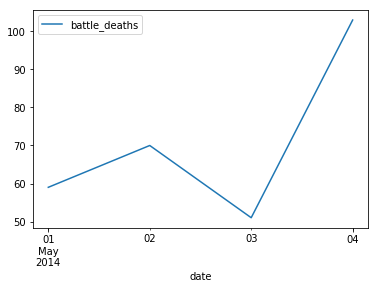

In [31]:
df.resample('D').sum().plot()